web scraping


In [ ]:
from bing_image_downloader import downloader
from PIL import Image
import os

# Define search terms and parameters
search_terms = ["bank statement", "profit and loss statement", "invoice", "salary slips","pay slips"]
output_dir = r"D:\vscode infosis\retrived images"

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Download images for each search term
for term in search_terms:
    downloader.download(term, limit=5, # Set number of images per term
                        output_dir=output_dir,
                        adult_filter_off=True, 
                        force_replace=False,
                        timeout=60)

    # Path for images of the current term
    term_dir = os.path.join(output_dir, term)
    
    # Gather all image paths in a list
    image_paths = [os.path.join(term_dir, img) for img in os.listdir(term_dir) if img.endswith(('jpg', 'jpeg', 'png'))]
    
    # Convert images to PDF
    if image_paths:  # Ensure there are images to process
        images = [Image.open(img_path).convert('RGB') for img_path in image_paths]
        
        # Save images as PDF
        pdf_path = os.path.join(output_dir, f"{term.replace(' ', '_')}.pdf")
        images[0].save(pdf_path, save_all=True, append_images=images[1:])
        
print("Images downloaded and saved as PDFs.")


Text Preprocessing


🚀 Processing Image 1: D:\vscode infosis\retrived images\bank statement\Image_12.jpg
✅ Saved: D:\vscode infosis\processed_images\grayscale.jpg


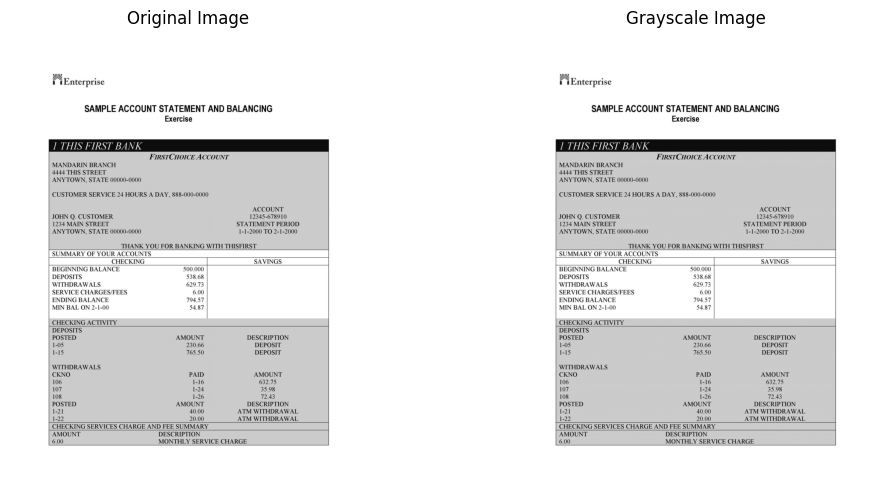


🚀 Processing Image 2: D:\vscode infosis\retrived images\bank statement\Image_2.jpg
✅ Saved: D:\vscode infosis\processed_images\binarized.jpg


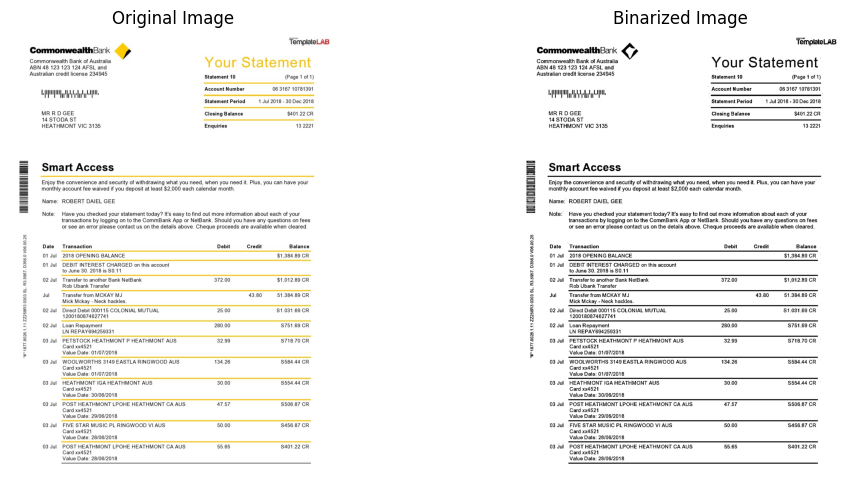


🚀 Processing Image 3: D:\vscode infosis\retrived images\bank statement\Image_3.jpg
✅ Saved: D:\vscode infosis\processed_images\denoised.jpg


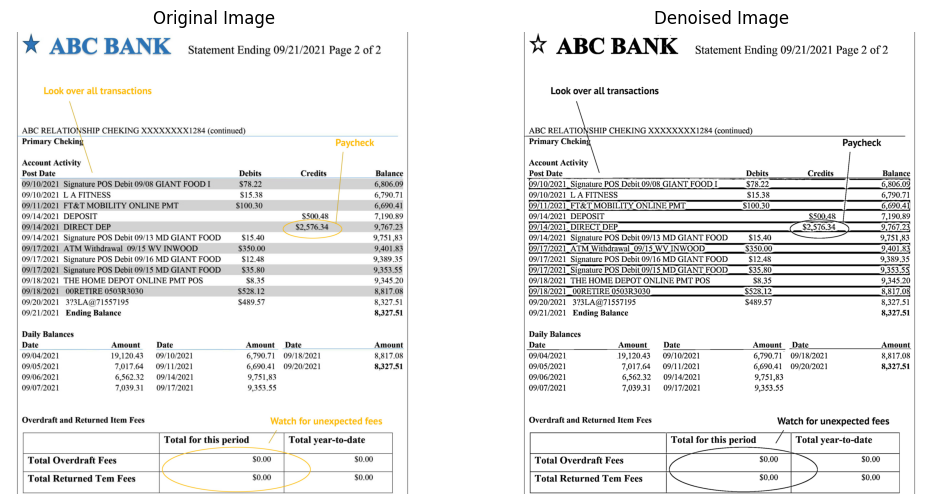


🚀 Processing Image 4: D:\vscode infosis\retrived images\bank statement\Image_4.jpg
✅ Saved: D:\vscode infosis\processed_images\morphological.jpg


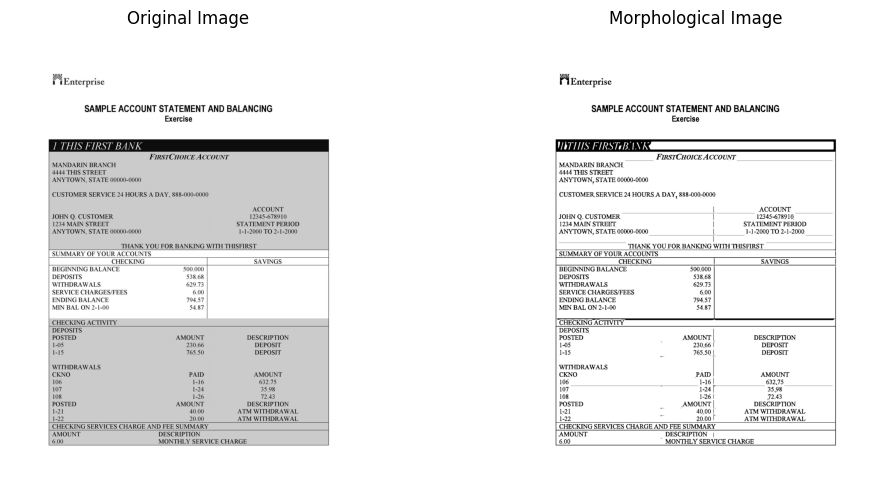


🚀 Processing Image 5: D:\vscode infosis\retrived images\bank statement\Image_5.jpg
✅ Saved: D:\vscode infosis\processed_images\deskewed.jpg


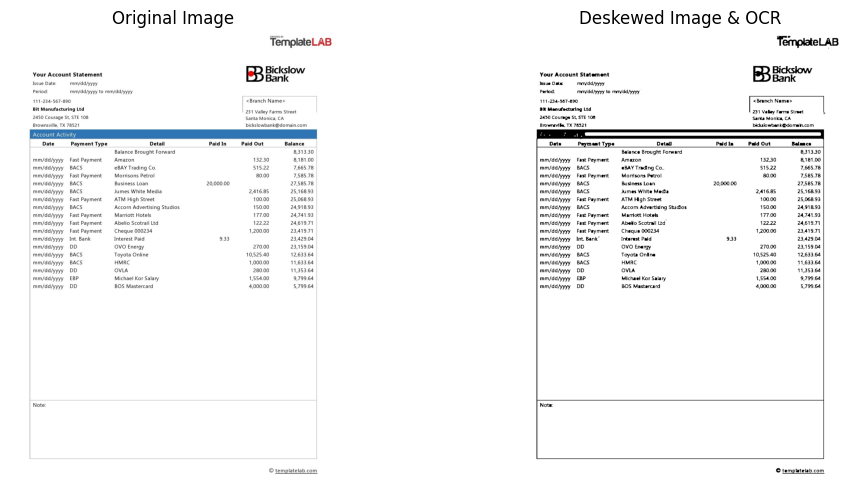

✅ Extracted text saved to: D:\vscode infosis\processed_images\extracted_text.txt

🎯 Processing complete! Check the output folder: D:\vscode infosis\processed_images


In [2]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import os

#  Set path to Tesseract OCR (Ensure Tesseract is installed properly)
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

#  Define multiple image paths
image_paths = [
    r"D:\vscode infosis\retrived images\bank statement\Image_12.jpg",  # Grayscale
    r"D:\vscode infosis\retrived images\bank statement\Image_2.jpg",  # Binarization
    r"D:\vscode infosis\retrived images\bank statement\Image_3.jpg",  # Denoising
    r"D:\vscode infosis\retrived images\bank statement\Image_4.jpg",  # Morphological
    r"D:\vscode infosis\retrived images\bank statement\Image_5.jpg",  # Deskew & OCR
]

#  Output folder for processed images
output_folder = r"D:\vscode infosis\processed_images"
os.makedirs(output_folder, exist_ok=True)  # Create folder if it doesn't exist

#  Function to save and display images
def save_and_show(original, processed, title, filename):
    # Save the processed image
    path = os.path.join(output_folder, filename)
    cv2.imwrite(path, processed)
    print(f"✅ Saved: {path}")

    # Display both original and processed images
    plt.figure(figsize=(12, 6))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    # Processed Image
    plt.subplot(1, 2, 2)
    plt.imshow(processed, cmap="gray")
    plt.title(title)
    plt.axis("off")

    plt.show()

#  Process each image with a different operation
for i, image_path in enumerate(image_paths):
    image = cv2.imread(image_path)

    if image is None:
        print(f"❌ Failed to load image: {image_path}")
        continue

    print(f"\n🚀 Processing Image {i+1}: {image_path}")

    if i == 0:
        #  Convert to grayscale
        processed_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        save_and_show(image, processed_image, "Grayscale Image", "grayscale.jpg")

    elif i == 1:
        #  Apply adaptive thresholding (Binarization)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        processed_image = cv2.adaptiveThreshold(
            gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2
        )
        save_and_show(image, processed_image, "Binarized Image", "binarized.jpg")

    elif i == 2:
        #  Apply Denoising
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        binary_image = cv2.adaptiveThreshold(
            gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2
        )
        processed_image = cv2.fastNlMeansDenoising(binary_image, None, 30, 7, 21)
        save_and_show(image, processed_image, "Denoised Image", "denoised.jpg")

    elif i == 3:
        #  Morphological Transformations
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        binary_image = cv2.adaptiveThreshold(
            gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2
        )
        denoised_image = cv2.fastNlMeansDenoising(binary_image, None, 30, 7, 21)
        kernel = np.ones((3, 3), np.uint8)
        processed_image = cv2.morphologyEx(denoised_image, cv2.MORPH_OPEN, kernel)
        save_and_show(image, processed_image, "Morphological Image", "morphological.jpg")

    elif i == 4:
        #  Deskew and OCR (Final Step)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        binary_image = cv2.adaptiveThreshold(
            gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2)
        denoised_image = cv2.fastNlMeansDenoising(binary_image, None, 30, 7, 21)
        kernel = np.ones((3, 3), np.uint8)
        morph_image = cv2.morphologyEx(denoised_image, cv2.MORPH_OPEN, kernel)

        #  Detect edges and compute skew
        edges = cv2.Canny(morph_image, 50, 150, apertureSize=3)
        lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=100, maxLineGap=10)

        angles = []
        if lines is not None:
            for line in lines:
                x1, y1, x2, y2 = line[0]
                angle = np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi
                angles.append(angle)
            skew_angle = np.median(angles)
        else:
            skew_angle = 0  # No skew detected

        #  Deskew image
        height, width = morph_image.shape
        M = cv2.getRotationMatrix2D((width / 2, height / 2), skew_angle, 1)
        processed_image = cv2.warpAffine(morph_image, M, (width, height))

        #  Perform OCR
        extracted_text = pytesseract.image_to_string(processed_image, lang='eng', config='--psm 6')

        #  Save final deskewed image
        save_and_show(image, processed_image, "Deskewed Image & OCR", "deskewed.jpg")

        #  Save extracted text
        text_file_path = os.path.join(output_folder, "extracted_text.txt")
        with open(text_file_path, "w", encoding="utf-8") as file:
            file.write(extracted_text)
        print(f"✅ Extracted text saved to: {text_file_path}")

#  Final message
print("\n🎯 Processing complete! Check the output folder:", output_folder)


In [7]:
import cv2
import numpy as np
import pytesseract
import os

# Set Tesseract OCR path (Ensure Tesseract is installed properly)
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Define multiple image paths
image_paths = [
    r"D:\vscode infosis\retrived images\bank statement\Image_12.jpg",
    r"D:\vscode infosis\retrived images\invoice\Image_6.png",
    r"D:\vscode infosis\retrived images\pay slips\Image_4.jpg",
    r"D:\vscode infosis\retrived images\profit and loss statement\Image_7.png",
    r"D:\vscode infosis\retrived images\salary slips\Image_4.png",
]

# Output folder for processed images and text
output_folder = r"D:\vscode infosis\processed_images"
os.makedirs(output_folder, exist_ok=True)  # Create folder if it doesn't exist

# Function to preprocess image for better OCR
def preprocess_image(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize to improve OCR accuracy
    scale_percent = 150  # Increase size by 150%
    width = int(gray.shape[1] * scale_percent / 100)
    height = int(gray.shape[0] * scale_percent / 100)
    gray = cv2.resize(gray, (width, height), interpolation=cv2.INTER_CUBIC)

    # Apply adaptive thresholding
    binary = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2
    )

    # Remove noise using Non-local Means Denoising
    denoised = cv2.fastNlMeansDenoising(binary, None, 30, 7, 21)

    # Apply morphological operations to clean up
    kernel = np.ones((2, 2), np.uint8)
    morph = cv2.morphologyEx(denoised, cv2.MORPH_CLOSE, kernel)

    return morph

# Function to extract text using Tesseract OCR
def extract_text(image):
    # Use optimized Tesseract OCR settings
    custom_config = r'--oem 3 --psm 6 -c tessedit_char_whitelist="ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789.,:-()"'
    return pytesseract.image_to_string(image, lang='eng', config=custom_config)

# Process each image
all_text = []
for i, image_path in enumerate(image_paths):
    image = cv2.imread(image_path)

    if image is None:
        print(f"❌ Failed to load image: {image_path}")
        continue

    print(f"\n🚀 Processing Image {i+1}: {image_path}")

    # Preprocess image
    processed_image = preprocess_image(image)

    # Extract text
    extracted_text = extract_text(processed_image)

    # Save processed image
    processed_image_path = os.path.join(output_folder, f"processed_{i+1}.jpg")
    cv2.imwrite(processed_image_path, processed_image)
    print(f"✅ Processed image saved: {processed_image_path}")

    # Save extracted text
    text_file_path = os.path.join(output_folder, f"text_{i+1}.txt")
    with open(text_file_path, "w", encoding="utf-8") as file:
        file.write(extracted_text)
    print(f"✅ Extracted text saved: {text_file_path}")

    # Store text for final report
    all_text.append(f"Image {i+1}:\n{extracted_text}\n{'='*40}\n")

# Save all extracted text into a single file
final_text_file = os.path.join(output_folder, "all_extracted_text.txt")
with open(final_text_file, "w", encoding="utf-8") as file:
    file.writelines(all_text)

print("\n🎯 OCR processing complete! Check the output folder:", output_folder)



🚀 Processing Image 1: D:\vscode infosis\retrived images\bank statement\Image_12.jpg
✅ Processed image saved: D:\vscode infosis\processed_images\processed_1.jpg
✅ Extracted text saved: D:\vscode infosis\processed_images\text_1.txt

🚀 Processing Image 2: D:\vscode infosis\retrived images\invoice\Image_6.png
✅ Processed image saved: D:\vscode infosis\processed_images\processed_2.jpg
✅ Extracted text saved: D:\vscode infosis\processed_images\text_2.txt

🚀 Processing Image 3: D:\vscode infosis\retrived images\pay slips\Image_4.jpg
✅ Processed image saved: D:\vscode infosis\processed_images\processed_3.jpg
✅ Extracted text saved: D:\vscode infosis\processed_images\text_3.txt

🚀 Processing Image 4: D:\vscode infosis\retrived images\profit and loss statement\Image_7.png
✅ Processed image saved: D:\vscode infosis\processed_images\processed_4.jpg
✅ Extracted text saved: D:\vscode infosis\processed_images\text_4.txt

🚀 Processing Image 5: D:\vscode infosis\retrived images\salary slips\Image_4.pn

OCR with Multiple language

In [ ]:
import cv2
import pytesseract
import os

def ocr_with_tesseract(image_path, lang="eng", oem=3, psm=6):
    """
    Perform OCR on an image using Tesseract.
    
    Parameters:
        image_path (str): Path to the input image.
        lang (str): Language(s) for OCR.
        oem (int): OCR Engine Mode.
        psm (int): Page Segmentation Mode.
        
    Returns:
        str: Extracted text from the image.
    """
    
    # Check if file exists
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Error: The file '{image_path}' does not exist.")
    
    # Read the image
    image = cv2.imread(image_path)

    # Check if the image is loaded correctly
    if image is None:
        raise ValueError("Error: Unable to load image. Check the file path and format.")

    # Convert image to grayscale for better OCR performance
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding (Optional: Improves OCR in some cases)
    gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

    # Set Tesseract configuration
    config = f'--oem {oem} --psm {psm} -l {lang}'

    # Perform OCR
    extracted_text = pytesseract.image_to_string(gray, config=config)

    return extracted_text

# Example usage
image_path = "D:/INFOSISMULTI LANGUAGE.webp"
# Debug: Check if the file path is correct
print(f"Checking image path: {image_path}")
if not os.path.exists(image_path):
    print("Error: Image file not found! Please check the path.")
else:
    print("Image file found! Proceeding with OCR...")

# Define languages (Example: English, French, and German)
languages = "eng+fra+deu"

# Run OCR with error handling
try:
    recognized_text = ocr_with_tesseract(image_path, lang=languages, oem=3, psm=6)
    print("Extracted Text:\n", recognized_text)
except Exception as e:
    print(e)
